In [27]:
#pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [1]:
#import needed packages

import os
import csv
import numpy as np
import pandas as p
from scipy import stats
import weighted
import matplotlib as mp
import seaborn as sns

In [2]:
os.getcwd()
os.chdir("/Users/susheel/Documents/GitHub/statistics-for-data-scientists/data")   #FILE DIRECTORY IN QUOTES
#os.listdir()

In [ ]:
# TOPIC: Location Estimates of Population and Murder Rates
# TASK: compute the mean, trimmed mean, and median for the population

In [4]:
state = p.read_csv(filepath_or_buffer = "state.csv")

In [14]:
np.mean(state.Population)

6162876.3

In [18]:
#have to use a different package (scipy) to calculate the trimmed mean
stats.trim_mean(state.Population, 0.1)

4783697.125

In [15]:
np.median(state.Population)

4436369.5

In [ ]:
# TASK: compute average murder rate for country

In [25]:
round(np.average(state['Murder.Rate'], weights = state.Population), 6)

4.445834

In [29]:
weighted.median(state['Murder.Rate'], state['Population'])

4.4

In [ ]:
# TOPIC: Variability Estimates of State Population
# TASK: compute the standard deviation, IQR and median absolute devision for the population

In [7]:
np.std(state['Population'])

#numpy std f'n might return values differing R because R uses n-1 df while numpy uses n

6779407.114632265

In [8]:
np.std(state['Population'], ddof = 1)

6848235.347401142

In [13]:
stats.iqr(state['Population'])

#numpy does not have a built-in IQR function but scipy does; if anything, below cell contains iqr function calculated through (q3 - q1) with numpy.percentile function -- arriving at the same answer

4847308.0

In [15]:
q3 = np.percentile(state['Population'], 75)
q1 = np.percentile(state['Population'], 25)

iqr = q3 - q1
print(iqr)

4847308.0


In [19]:
stats.median_abs_deviation(state['Population'])

#differs from the R value (3849870) so implementing formula manually in below cell

2596702.0

In [5]:
#type(state['Population'])

median_minus_observed = p.Series()
median_minus_observed = state['Population'] - np.median(state['Population'])
abs_median_minus_observed = np.absolute(median_minus_observed)
median_absolute_deviation = np.median(abs_median_minus_observed)
median_absolute_deviation

#receiving same result (2596702) in R when manually calculating Median Absolute Deviation
# also receiving same result (2596702) in R when using mad() f'n and constant = 1

<ipython-input-5-1f7b6a962419>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  median_minus_observed = p.Series()


2596702.0

In [14]:
#stats.median_absolute_deviation(state['Population'])
#when performing the above function, receiving a DeprecationWarning: 
'''
<ipython-input-10-a731dec4ff69>:1: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  stats.median_absolute_deviation(state['Population'])
'''

stats.median_abs_deviation(state['Population'], scale = 1)
#when scale = 1, receiving 2596702.0
#when scale = 1/1.4826, receiving 3849870.3852

2596702.0

In [5]:
# TOPIC: Data distribution 
# TASK: Calculate percentiles of the Murder Rate by State

np.percentile(state['Murder.Rate'], 5)

6.51

In [9]:
np.percentile(state['Murder.Rate'], 25)

2.425

In [10]:
np.percentile(state['Murder.Rate'], 50)

4.0

In [11]:
np.percentile(state['Murder.Rate'], 75)

5.549999999999999

In [12]:
np.percentile(state['Murder.Rate'], 95)

6.51

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9399157b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9399160280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93991577f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9399160940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9399160ca0>],
 'means': []}

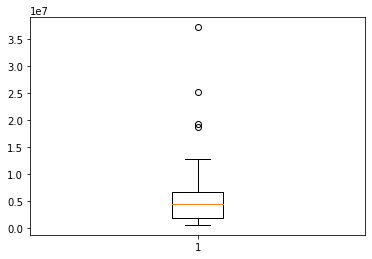

In [16]:
# TASK: Boxplot of the Population by State

#matplotlib
mp.pyplot.boxplot(state['Population'])

#pandas
#state.boxplot('Population')

In [21]:
###  IGNORE

'''
#Frequency table of Population 

#no standard function to do this in Python, have to do this in conjunction with numpy.histogram function 

#1: make breaks
max_state_pop = max(state['Population'])
min_state_pop = min(state['Population'])

range_state_pop = max_state_pop - min_state_pop
bin_size = range_state_pop / 10
'''

In [27]:
# TASK: Create frequency table of Population 

Abs_frecuency, intervals = np.histogram(state['Population'], bins = 10)

df = p.DataFrame(index = np.linspace(1,10,10), columns = ['start', 'end', 'state_population','Frec_abs'])
# Assign the intervals
df['start'] = intervals[:-1]
df['end'] = intervals[1:]
# Calculate class marks
df['state_population'] = (df['start'] + df['end'])/2
# Assing Absolute frecuency
df['Frec_abs'] = Abs_frecuency

#df

#REFERENCE: https://medium.com/pythoneers/histograms-and-frequently-table-in-python-an-approximation-to-the-selection-of-the-number-of-bins-312965281857

,start,end,state_population,Frec_abs
1.0,563626.0,4232659.0,2398142.5,24
2.0,4232659.0,7901692.0,6067175.5,14
3.0,7901692.0,11570725.0,9736208.5,6
4.0,11570725.0,15239758.0,13405241.5,2
5.0,15239758.0,18908791.0,17074274.5,1
6.0,18908791.0,22577824.0,20743307.5,1
7.0,22577824.0,26246857.0,24412340.5,1
8.0,26246857.0,29915890.0,28081373.5,0
9.0,29915890.0,33584923.0,31750406.5,0
10.0,33584923.0,37253956.0,35419439.5,1


array([[<AxesSubplot:title={'center':'Population'}>]], dtype=object)

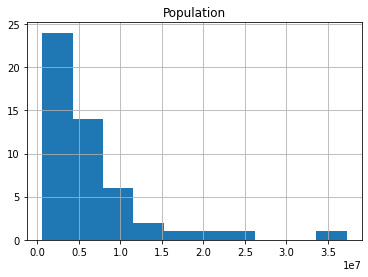

In [8]:
# TASK: Histogram of State Population

state.hist(['Population'], bins = 10)

<AxesSubplot:xlabel='Murder.Rate', ylabel='Probability'>

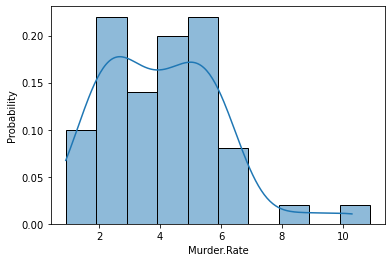

In [27]:
# TASK: Depict density estimate plot of Murder Rate

sns.histplot(state['Murder.Rate'], bins = 10, stat = 'probability', binwidth = 1, kde = True)

#had to use new module (seaborn) for histplot and argument 'kde' to get the smooth curve overlayed on the histogram

In [123]:
dfw = p.read_csv(filepath_or_buffer = "dfw_airline.csv", index_col = False)
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


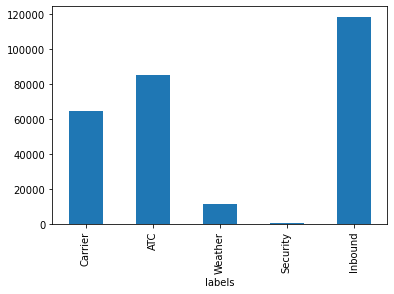

In [124]:
# TOPIC: Explore Binary and Categorical Data
# TASK: Barplot to show airport delays per year by cause for DFW 

#Python has no standard f'n for barplot so using pandas DataFrame.plot.bar. 
#Also, due to format of data, had to be restructured and faced difficulty in doing so

dfw = dfw.transpose()

labels = []
values = []
num_of_values = len(dfw)

i = dfw.index
for x in i:
    labels.append(x)
    
for i in range(num_of_values):
    values.append((dfw.loc[:,0][i]))
    
dfw_df = p.DataFrame({'labels':labels, 'counts':values})
plot = dfw_df.plot.bar(x = 'labels', y = 'counts', legend = False)

In [5]:
# TASK: Create correlation matrix
wines = p.read_csv("winequality-red.csv")

wines_corr = wines.corr()

wines_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


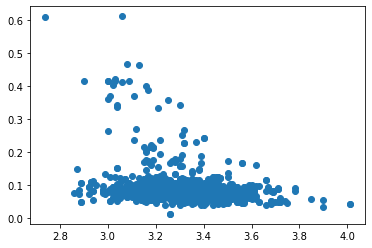

In [6]:
# TASK: Scatterplot to explore relationship between pH and chlorides in winequality-red data
mp.pyplot.scatter(x = wines['pH'], y = wines['chlorides'])

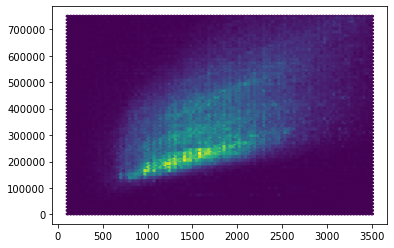

In [14]:
# TASK: hexagonal binning to explore relationship between SqftTotLiving and TaxAssessedValue

df = p.read_csv("kc_tax.csv")

#subsetting to reduce amount of data
df = df[(df['TaxAssessedValue'] < 750000) & (df['SqFtTotLiving'] > 100) & (df['SqFtTotLiving'] < 3500)]

mp.pyplot.hexbin(x = df['SqFtTotLiving'], y = df['TaxAssessedValue'])

IndexError: tuple index out of range

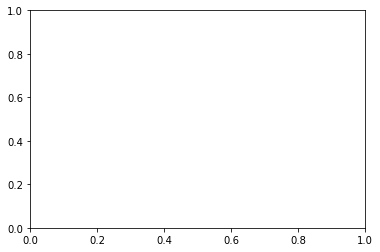

In [15]:
# TASK: contour plot to explore relationship between SqftTotLiving and TaxAssessedValue
data = np.loadtxt("full_energy.dat")
#
#
#
#
#
#
# STILL HAVE TO DO 
#
#
#
#
#
#

#mp.pyplot.contour(x = df['SqFtTotLiving'], y = df['TaxAssessedValue'])